In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

<AxesSubplot:xlabel='Fecha'>

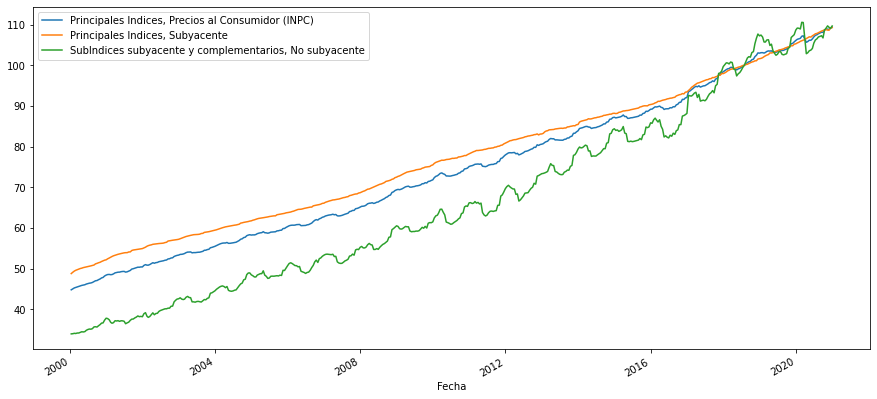

In [108]:
inflation_train = pd.read_csv("./../data/trainset.csv")
inflation_train["Fecha"] = pd.Series(pd.date_range('2000-01-15', periods=inflation_train.shape[0], freq='SM').normalize(), name='Date')
inflation_train.set_index('Fecha')
inflation_train.plot(x="Fecha", figsize=(15, 7))

<AxesSubplot:xlabel='Fecha'>

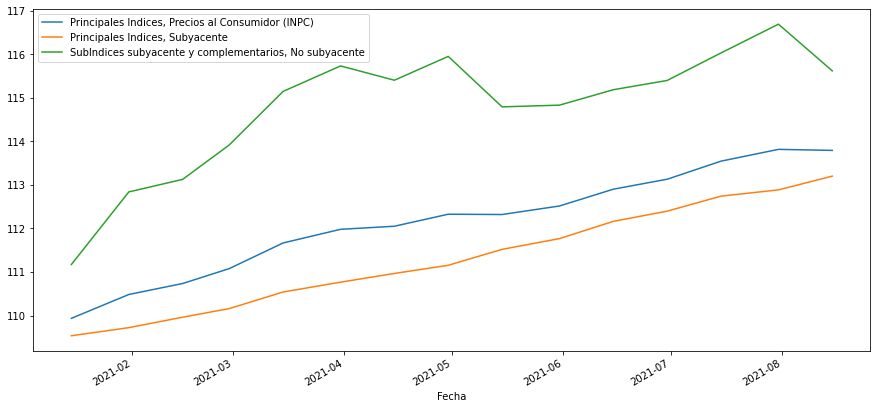

In [109]:
inflation_test = pd.read_csv("./../data/testset.csv")
inflation_test["Fecha"] = pd.Series(pd.date_range('2021-01-15', periods=inflation_train.shape[0], freq='SM').normalize(), name='Date')
inflation_test.set_index('Fecha')
inflation_test.plot(x="Fecha", figsize=(15, 7))

<AxesSubplot:xlabel='Fecha'>

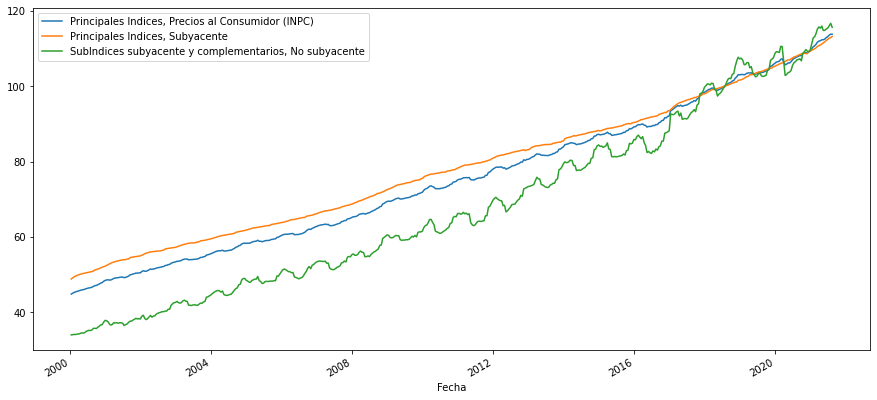

In [78]:
inflation_total_dataset = inflation_train.append(inflation_test, ignore_index=True)
inflation_total_dataset.plot(x="Fecha", figsize=(15, 7))

<AxesSubplot:>

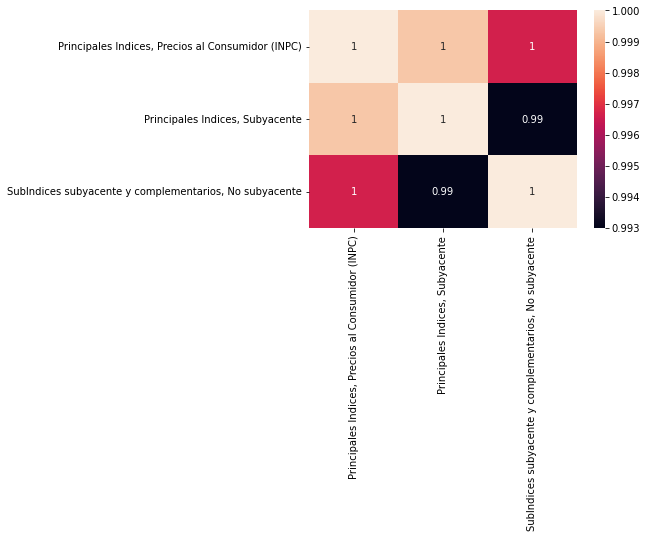

In [116]:
sn.heatmap(inflation_total_dataset.corr(), annot=True)

<AxesSubplot:xlabel='Fecha'>

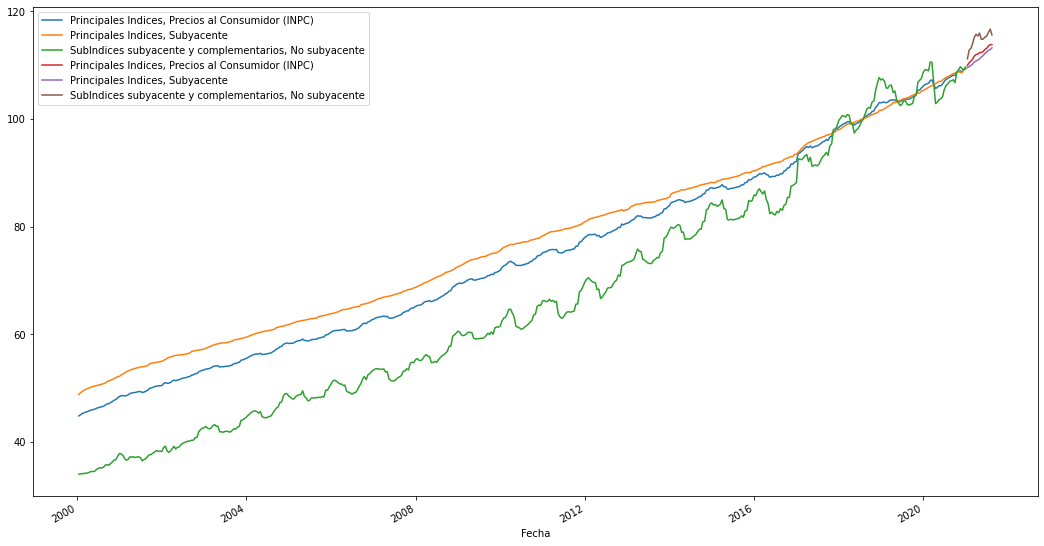

In [106]:
fig, ax = plt.subplots(figsize=(18, 10))
inflation_train.plot(ax=ax, x="Fecha")
inflation_test.plot(ax=ax, x="Fecha")

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_absolute_error

In [143]:
linear_r_model = ForecasterAutoreg(regressor=LinearRegression(),
  lags=50)
linear_r_model.fit(y=inflation_train["Principales Indices, Subyacente"])
predicted = linear_r_model.predict(steps=15)

test = pd.DataFrame(inflation_test["Principales Indices, Subyacente"])
test["Predicted"] = predicted
print(test)
print(mean_absolute_error(test["Principales Indices, Subyacente"], test["Predicted"]))

    Principales Indices, Subyacente   Predicted
0                        109.535926  109.467784
1                        109.721867  109.576370
2                        109.961759  109.781358
3                        110.160047  109.934623
4                        110.541054  110.153263
5                        110.766903  110.272469
6                        110.966931  110.575995
7                        111.154931  110.710579
8                        111.520667  110.870291
9                        111.767779  110.986043
10                       112.163713  111.237413
11                       112.398553  111.360261
12                       112.742999  111.625131
13                       112.887154  111.719968
14                       113.202701  111.919202
0.6201490294536199


<AxesSubplot:>

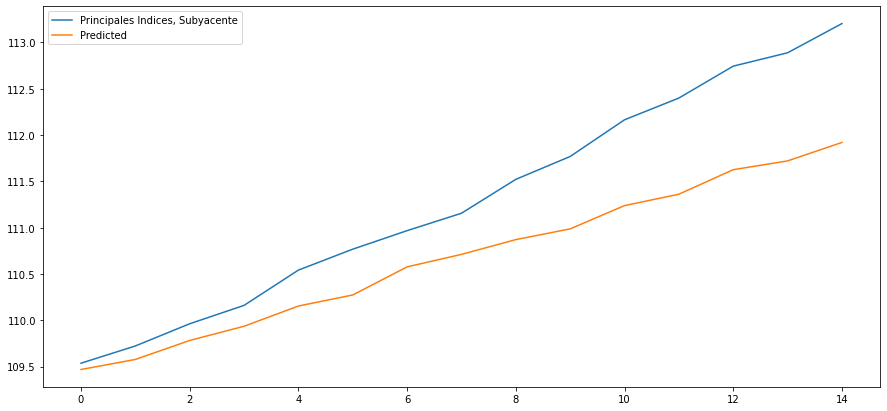

In [141]:
test.plot(figsize=(15, 7))

In [142]:
logistic_r_model = ForecasterAutoreg(regressor=Ridge(),
  lags=30)
logistic_r_model.fit(y=inflation_train["Principales Indices, Subyacente"])
predicted = logistic_r_model.predict(steps=15)

test = pd.DataFrame(inflation_test["Principales Indices, Subyacente"])
test["Predicted"] = predicted
print(test)
print(mean_absolute_error(test["Principales Indices, Subyacente"], test["Predicted"]))

    Principales Indices, Subyacente   Predicted
0                        109.535926  109.491622
1                        109.721867  109.642236
2                        109.961759  109.842510
3                        110.160047  109.950349
4                        110.541054  110.172219
5                        110.766903  110.305536
6                        110.966931  110.514447
7                        111.154931  110.648591
8                        111.520667  110.856152
9                        111.767779  110.954424
10                       112.163713  111.174022
11                       112.398553  111.325549
12                       112.742999  111.564358
13                       112.887154  111.707796
14                       113.202701  111.931234
0.6274626498013618


<AxesSubplot:>

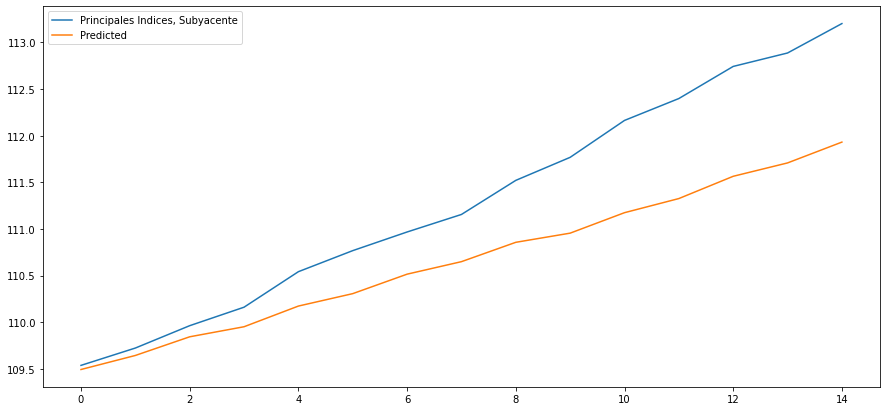

In [137]:
test.plot(figsize=(15, 7))

In [148]:
logistic_r_model = ForecasterAutoreg(regressor=SVR(),
  lags=30)
logistic_r_model.fit(y=inflation_train["Principales Indices, Subyacente"])
predicted = logistic_r_model.predict(steps=15)

test = pd.DataFrame(inflation_test["Principales Indices, Subyacente"])
test["Predicted"] = predicted
print(test)
print(mean_absolute_error(test["Principales Indices, Subyacente"], test["Predicted"]))

    Principales Indices, Subyacente   Predicted
0                        109.535926  104.610134
1                        109.721867  104.520650
2                        109.961759  104.431085
3                        110.160047  104.342466
4                        110.541054  104.253000
5                        110.766903  104.168401
6                        110.966931  104.084871
7                        111.154931  104.005441
8                        111.520667  103.929431
9                        111.767779  103.859460
10                       112.163713  103.793723
11                       112.398553  103.733643
12                       112.742999  103.679133
13                       112.887154  103.632348
14                       113.202701  103.593315
7.257059024599809


In [149]:
import pmdarima as pm

In [150]:
model = pm.auto_arima(inflation_train, start_p=0, start_q=0)
best_order = model.get_params()['order']
best_seasonal_order = model.get_params()['seasonal_order']
model.summary()

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)